<a href="https://colab.research.google.com/github/adrianstando/Research-Workshops-Rashomon-Machine-Learning/blob/main/assignments/homework5/05_hiperparameters_influence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load libraries

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import auc as auc_score
from sklearn.utils import shuffle

import pickle
import os.path

from sklearn.inspection import partial_dependence, plot_partial_dependence

## Load model results



In [3]:
results = np.load('results.npy', allow_pickle=True)

In [88]:
data = []
for index, row in results.iterrows():
  values = []
  for key, value in row['params'].items():

    values.append(value)
  values.append(row['mean_test_score'])  
  data.append(values)

In [101]:
col_names = list(results['params'].values[0].keys())
col_names.append('mean_test_score')

In [102]:
df = pd.DataFrame(data, columns=col_names)

In [110]:
df

,subsample,n_estimators,min_child_weight,max_depth,learning_rate,lambda,colsample_bytree,colsample_bylevel,booster,alpha,mean_test_score
0,0.810526,730,2.151381,15,0.004202,26.664384,0.737105,0.001000,gbtree,0.037503,0.835130
1,0.289474,280,27.655101,7,0.077793,0.694326,1.000000,0.737105,gbtree,6.197039,0.859300
2,0.668421,680,76.806574,4,0.482088,6.197039,1.000000,1.000000,gbtree,6.197039,0.830569
3,0.431579,730,21.422466,10,0.006052,114.730508,0.684526,0.842263,gbtree,114.730508,0.817475
4,0.147368,180,99.152617,13,0.008716,0.018080,0.474211,0.106158,gbtree,0.334726,0.787429
...,...,...,...,...,...,...,...,...,...,...,...
155,0.431579,530,2.777302,14,0.002026,0.694326,0.947421,0.421632,gbtree,26.664384,0.849998
156,0.289474,430,99.152617,7,0.112042,0.037503,0.474211,0.106158,gbtree,0.694326,0.845528
157,0.621053,430,21.422466,3,0.000977,237.986651,0.053579,0.474211,gbtree,0.004202,0.811938
158,0.100000,530,5.975036,10,0.232409,0.334726,0.684526,0.369053,dart,0.694326,0.774062


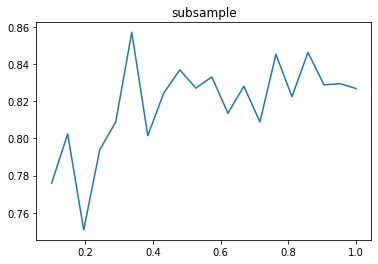

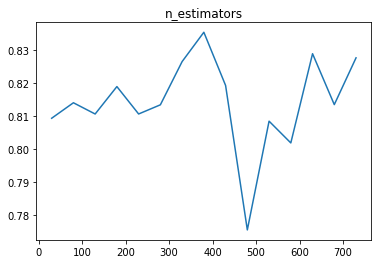

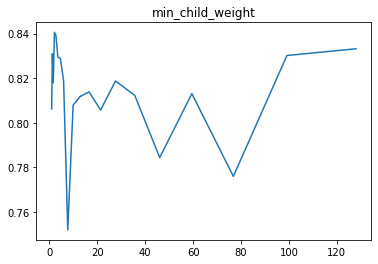

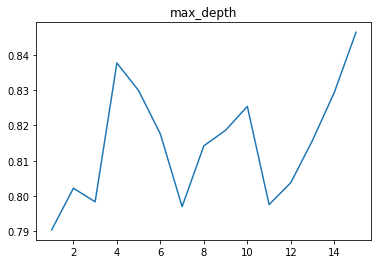

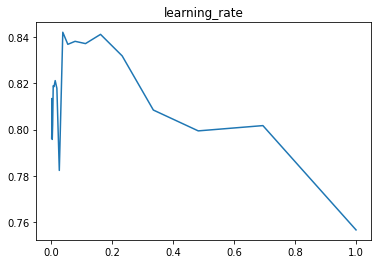

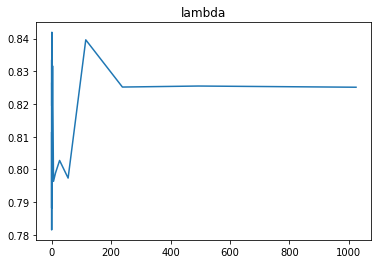

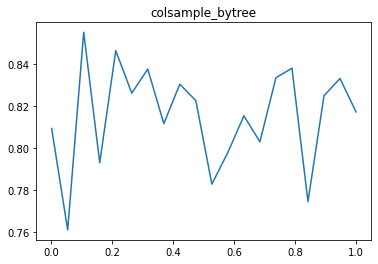

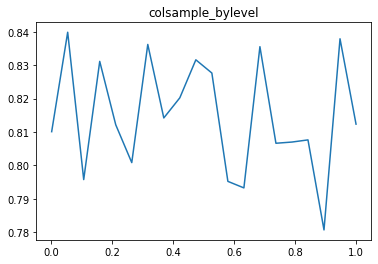

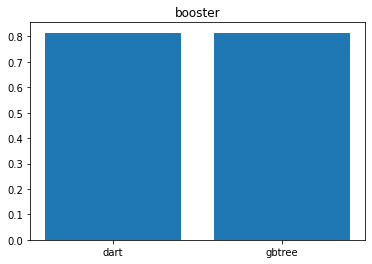

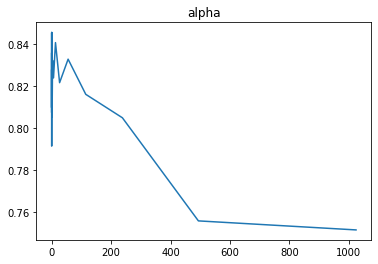

In [112]:
for column in df.loc[:, df.columns != 'mean_test_score']:
  grouped_df = df[[column, 'mean_test_score']].groupby(as_index=False, by=[column]).mean()

  if column == 'booster':
    plt.bar(grouped_df[column],grouped_df['mean_test_score'])

  else:
    plt.figure()
    plt.plot(grouped_df[column],grouped_df['mean_test_score'])
  
  plt.title(column)
  plt.show()


In [8]:
for 

{'alpha': 12.854579625070118,
 'booster': 'dart',
 'colsample_bylevel': 1.0,
 'colsample_bytree': 0.1061578947368421,
 'lambda': 0.018079847457542493,
 'learning_rate': 0.07779328684150147,
 'max_depth': 9,
 'min_child_weight': 9.957540715712184,
 'n_estimators': 580,
 'subsample': 0.43157894736842106}

In [51]:
results[results.mean_test_score == np.max(results.mean_test_score)]['params'].values[0]

{'alpha': 55.31020117002273,
 'booster': 'gbtree',
 'colsample_bylevel': 0.26389473684210524,
 'colsample_bytree': 0.5793684210526315,
 'lambda': 1.440246537538758,
 'learning_rate': 0.03750320998681571,
 'max_depth': 14,
 'min_child_weight': 5.975035846617943,
 'n_estimators': 230,
 'subsample': 0.43157894736842106}